The following code is an attempt to explain Adaboost classifier with an example.
For learning the fundamentals of adaboost watch the Youtube Video, link mentioned below.
https://youtu.be/lj724M9dC4M

For mathematical theory the following weblink is helpful.
No need to rack your brain with all the mathematical notations, just get the condensed idea after reading it.
https://machinelearningmastery.com/boosting-and-adaboost-for-machine-learning/

Adaboost in brief:
It is called Adaptive Boosting.
Firstly it builds a weak classifier, then tries to incrementally improve classification with other weak classifiers.
The final output is average of all the weak classifiers combined. 
This attempt to incrementally improve upon classification is called 'Boosting'.

Same as Random Forest?  NO!
Differences with Random Forest.

1)In Random forest, decision tree is the default classiifer, in Adaboost the base estimator can be anything (Decision tree or Logistic Regressor)
2)In Random Forest, the tree depth of each tree classifer may vary . In Adaboost the depth of all classifiers in same.
3)In Random Forest all the classifiers (trees) have the same amount say (weight in deciding the output). In Adaboost classifers are ranked, those that classify better are given higher amount of say, this is also called feature importance. So Adaboost can decide which feature is more decisive and which is not. This often is the case of real world problem.
4)Observation has been that Adaboost is better performer than Random Forest.


No Machine Learning Model is Perfect, But some are useful.
In the real world problems, there may not exist any relation between some of the predictors and the output.
However Adaboost tries weigh in the imprtance of each feature, in predicting the outocome somewhat fairly.




In [80]:
import pandas as pd
import numpy as np

I am using the Titanic Dataset.
In here I will use the Adaboost from Scikit-learn.
I will implement all the associate functions to demonstrate the theory part you covered (Video/webpage)

In [81]:
#load your files through your own paths
df_train=pd.read_csv("C:/Users/adity/OneDrive/Desktop/Analytics Vidya/Titanic/train.csv")
df_test=pd.read_csv("C:/Users/adity/OneDrive/Desktop/Analytics Vidya/Titanic/test.csv")


In [82]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Columns like PassengerId, Name, Ticket are poor predictors of survival. We will drop them.
There are categorical variables like Sex, Cabin adn Embarked we will label encode them.

Some features are not at all predictors, hence we will frop them.

In [83]:
df_train.drop(['PassengerId','Ticket','Name'], axis=1, inplace=True)
df_test.drop(['PassengerId','Ticket','Name'], axis=1, inplace=True)


Drop the rows that contain null values

In [84]:
df_train.dropna(axis=0, how='any' ,inplace=True)
df_test.dropna(axis=0, how='any' ,inplace=True)


In [85]:
df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)

In [86]:
df_train['Cabin'].unique()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'D33', 'B30', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12', 'D26',
       'C110', 'B58 B60', 'E101', 'D47', 'B86', 'F2', 'C2', 'B19', 'A7',
       'C49', 'F4', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'B49',
       'D', 'C22 C26', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'E33', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'C52', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'E12', 'E63', 'B37', 'C30', 'D20', 'B79',
       'E25', 'D46', 'B73', 'B38', 'B39', 'B22', 'C86', 'C70', 'A16',
       'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19', 'D50', 'D9',
       'A23', 'B50', 'A26', 'D48', 'E58', 'B71', 'B51 B53 B55', 'D49',
       'B5', 'B20', 'F G63', 'C62 C64', 'E24', 'C90', 'C126', 'C45', 'E8',
       'B101', 'C46', 'D30', 'E121', 'D11', 'E77', 'B3', 'D6', 'B

In [87]:
len(df_train)

183


The cabins may be good predictor of outcome.
For example, when iceberg hit the Ship, those cabins near to site of impact were more vulnerable than others. 
The numbers associated with the alphabets may be NOT!
Hence we will drop the numeric suffixes associated and retain the alphabets.

In [88]:
df_train['Cabin']=df_train['Cabin'].apply(lambda x:list(x)[0])
df_test['Cabin']=df_test['Cabin'].apply(lambda x:list(x)[0])


In [89]:
df_train.columns

Index(['index', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [90]:
df_train.dtypes

index         int64
Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [91]:
df_train.isnull().sum()

index       0
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Convert all the Categorical variables to one-hot encoded variables. Use Get dummies function.
Rename certain columns after encoding.


In [365]:
dfT1=df_train[['Pclass', 'Age','Parch'] ]
dfT2=pd.get_dummies(df_train['Pclass'])
dfT3=pd.get_dummies(df_train['Sex'])
dfT4=pd.get_dummies(df_train['Cabin'])
dfT5=pd.get_dummies(df_train['Embarked'])


test1=df_train[['Survived','Pclass', 'Age','Parch'] ]
test2=pd.get_dummies(df_train['Pclass'])
test3=pd.get_dummies(df_train['Sex'])
test4=pd.get_dummies(df_train['Cabin'])
test5=pd.get_dummies(df_train['Embarked'])

train_new=pd.concat([dfT1,dfT2,dfT3,dfT4,dfT5], axis=1)
test_new=pd.concat([test1,test2,test3,test4,test5], axis=1)


train_new.rename(columns={1: "pclass1", 2: "pclass2",3:"pclass3"}, inplace=True)
test_new.rename(columns={1: "pclass1", 2: "pclass2",3:"pclass3"},inplace=True)



In [272]:

X=train_new
y=np.asarray(df_train[['Survived']])


Split the Data for training and validation

In [273]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The base estimator I am using is the Decision tree classiifer with maximum depth=1.


In [325]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error


base_est = DecisionTreeClassifier(max_depth=1)
n_est=[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30, 32,34,36,38,40]


mse_list=[]
acc_list=[]


y_train=y_train.reshape(len(y_train),)
y_test=y_test.reshape(len(y_test),)

for est in n_est:
    clf = AdaBoostClassifier(random_state=42, n_estimators=est, base_estimator=base_est, algorithm="SAMME")
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    mse=mean_squared_error(y_pred, np.asarray(y_test))
    acc=clf.score(X_test, y_test)
    mse_list.append(mse)
    acc_list.append(acc)
    print("Estimators %d, Mean Squared Error %f, Accuracy %f" %(est,mse,acc))
    



C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warni

Estimators 2, Mean Squared Error 0.432432, Accuracy 0.567568
Estimators 4, Mean Squared Error 0.270270, Accuracy 0.729730
Estimators 6, Mean Squared Error 0.324324, Accuracy 0.675676
Estimators 8, Mean Squared Error 0.324324, Accuracy 0.675676
Estimators 10, Mean Squared Error 0.351351, Accuracy 0.648649
Estimators 12, Mean Squared Error 0.270270, Accuracy 0.729730
Estimators 14, Mean Squared Error 0.351351, Accuracy 0.648649
Estimators 16, Mean Squared Error 0.351351, Accuracy 0.648649
Estimators 18, Mean Squared Error 0.351351, Accuracy 0.648649
Estimators 20, Mean Squared Error 0.270270, Accuracy 0.729730


C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warni

Estimators 22, Mean Squared Error 0.270270, Accuracy 0.729730
Estimators 24, Mean Squared Error 0.270270, Accuracy 0.729730
Estimators 26, Mean Squared Error 0.270270, Accuracy 0.729730


C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warni

Estimators 28, Mean Squared Error 0.270270, Accuracy 0.729730
Estimators 30, Mean Squared Error 0.270270, Accuracy 0.729730
Estimators 32, Mean Squared Error 0.405405, Accuracy 0.594595


C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


Estimators 34, Mean Squared Error 0.405405, Accuracy 0.594595


C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


Estimators 36, Mean Squared Error 0.324324, Accuracy 0.675676
Estimators 38, Mean Squared Error 0.324324, Accuracy 0.675676
Estimators 40, Mean Squared Error 0.297297, Accuracy 0.702703


C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


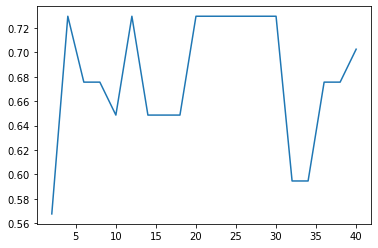

In [326]:
import matplotlib.pyplot as plt
plt.plot(n_est, acc_list)

The above plot is n_estimators 'vs' accurcay.
Having too less estimators is underfitting.
Too many estimators will cause overfitting, also adds to computational complexity.

Let me choose a modest choice of n_estimator=22.



Now with a given number of estimators, let me explore different tree depths.

In [327]:
tree_depth=[2,3,4,5,6,7,8,9]


mse_list=[]
acc_list=[]


y_train=y_train.reshape(len(y_train),)
y_test=y_test.reshape(len(y_test),)

for dpt in tree_depth:
    clf = AdaBoostClassifier(random_state=42, n_estimators=22, base_estimator=DecisionTreeClassifier(max_depth=dpt), algorithm="SAMME")
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    mse=mean_squared_error(y_pred, np.asarray(y_test))
    acc=clf.score(X_test, y_test)
    mse_list.append(mse)
    acc_list.append(acc)
    print("Estimators %d, Mean Squared Error %f, Accuracy %f" %(est,mse,acc))
    

C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warni

Estimators 40, Mean Squared Error 0.297297, Accuracy 0.702703
Estimators 40, Mean Squared Error 0.351351, Accuracy 0.648649
Estimators 40, Mean Squared Error 0.324324, Accuracy 0.675676


C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warni

Estimators 40, Mean Squared Error 0.324324, Accuracy 0.675676
Estimators 40, Mean Squared Error 0.297297, Accuracy 0.702703
Estimators 40, Mean Squared Error 0.351351, Accuracy 0.648649
Estimators 40, Mean Squared Error 0.324324, Accuracy 0.675676
Estimators 40, Mean Squared Error 0.351351, Accuracy 0.648649


C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


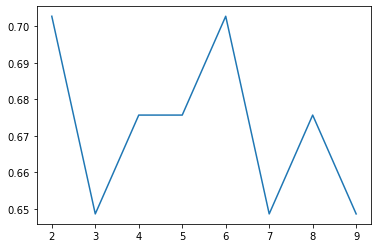

In [328]:
plt.plot(tree_depth, acc_list)

In the above plot we observe that having deeper trees will not increase accuracy.
This is proof to the earlier statement, that Adaboost is better than RandomForest(with deeper trees)

Now I will dissect the classifier further.
I will explore the associate functions.

We will know about estimators, feature importances, decision function, staged decision function.



In [329]:
ada_clf = AdaBoostClassifier(random_state=42, n_estimators=22, base_estimator=base_est, algorithm="SAMME")
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=22, random_state=42)

In [332]:
ada_clf.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=1608637542),
 DecisionTreeClassifier(max_depth=1, random_state=1273642419),
 DecisionTreeClassifier(max_depth=1, random_state=1935803228),
 DecisionTreeClassifier(max_depth=1, random_state=787846414),
 DecisionTreeClassifier(max_depth=1, random_state=996406378),
 DecisionTreeClassifier(max_depth=1, random_state=1201263687),
 DecisionTreeClassifier(max_depth=1, random_state=423734972),
 DecisionTreeClassifier(max_depth=1, random_state=415968276),
 DecisionTreeClassifier(max_depth=1, random_state=670094950),
 DecisionTreeClassifier(max_depth=1, random_state=1914837113),
 DecisionTreeClassifier(max_depth=1, random_state=669991378),
 DecisionTreeClassifier(max_depth=1, random_state=429389014),
 DecisionTreeClassifier(max_depth=1, random_state=249467210),
 DecisionTreeClassifier(max_depth=1, random_state=1972458954),
 DecisionTreeClassifier(max_depth=1, random_state=1572714583),
 DecisionTreeClassifier(max_depth=1, random_state=1433267572),


In [333]:
ada_clf.estimator_weights_

array([1.04454507, 1.18631787, 0.56121087, 0.44739147, 0.33832519,
       0.57703721, 0.29801739, 0.18515958, 0.38668549, 0.28446498,
       0.14280476, 0.3639533 , 0.19678732, 0.33912053, 0.08108301,
       0.24123624, 0.17537782, 0.21937897, 0.29945713, 0.10922972,
       0.07429028, 0.07162845])

Above are the List of estimators and associated weights.
Notice that in estimator weights, some have larger value and some lower. The output is sum of all these weights put together for a particular weight sample.

In [330]:
ada_clf.feature_names_in_

array(['Pclass', 'Age', 'Parch', 'pclass1', 'pclass2', 'pclass3',
       'female', 'male', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'C', 'Q',
       'S'], dtype=object)

In [331]:
ada_clf.feature_importances_

array([0.03731421, 0.47105059, 0.04454541, 0.        , 0.        ,
       0.03909193, 0.13701642, 0.10642677, 0.        , 0.        ,
       0.07569187, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.08886279, 0.        , 0.        ])

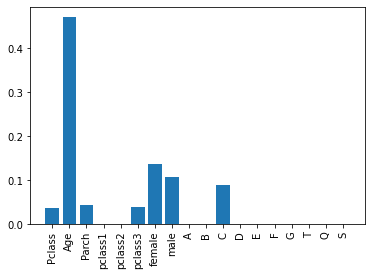

In [334]:
plt.bar(ada_clf.feature_names_in_, ada_clf.feature_importances_)
_=plt.xticks(rotation=90)

Above is the plot of featurs and their importances.
The Adaboost classifier has accounted for all the columns in the train dataset.
The columns Age, Female,C are good predictor hence have larger weights others have less.

Let us verify using individual decision trees function.

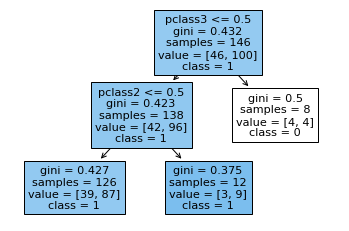

In [408]:
from sklearn import tree

dtree = DecisionTreeClassifier(random_state=0, criterion="gini")
dtree.fit(X_train[['pclass1','pclass2','pclass3']], y_train)

_=tree.plot_tree(dtree, feature_names=X_train[['pclass1','pclass2','pclass3']].columns,class_names=['0','1'], filled=True)


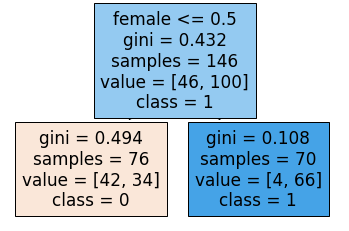

In [409]:
dtree.fit(X_train[['male','female']], y_train)

_=tree.plot_tree(dtree, feature_names=X_train[['male','female']].columns,class_names=['0','1'], filled=True)


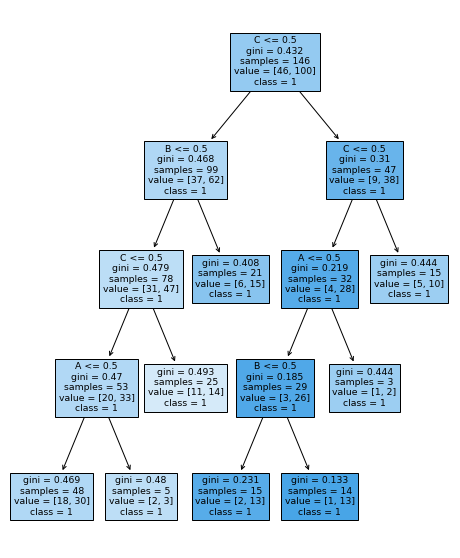

In [412]:
dtree.fit(X_train[['A','B','C']], y_train)
plt.figure(figsize=(8,10))
_=tree.plot_tree(dtree, feature_names=X_train[['A','B','C']].columns,class_names=['0','1'], filled=True)


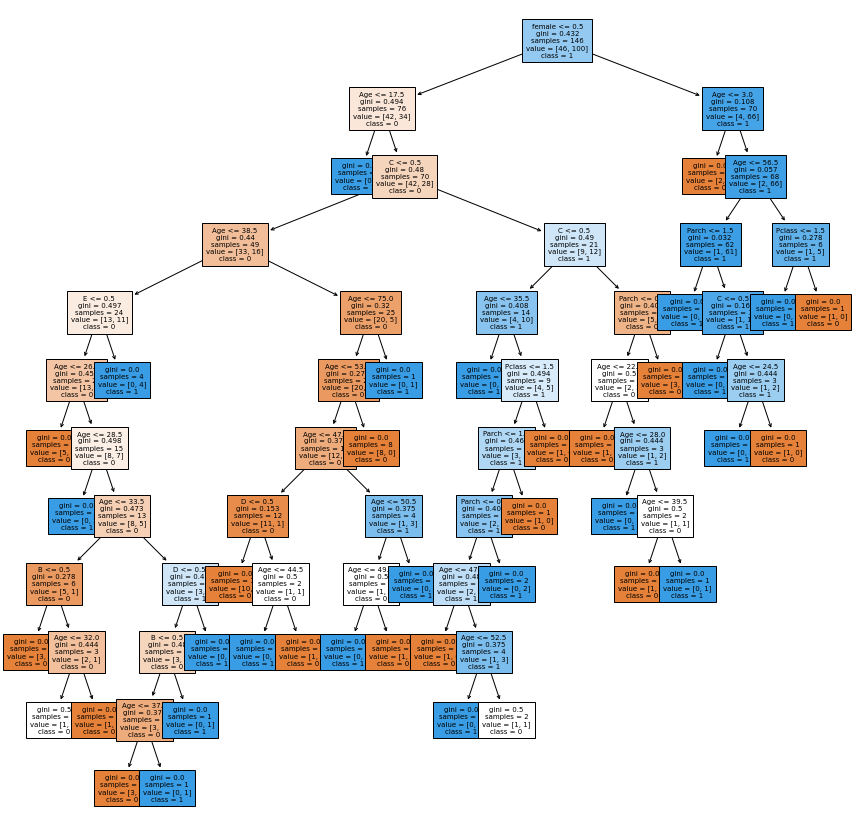

In [419]:
dtree.fit(X_train, y_train)
plt.figure(figsize=(15,15))
_=tree.plot_tree(dtree, feature_names=X_train.columns,class_names=['0','1'], filled=True, fontsize=7)


The Above plots are a very important one.

1)In the first tree plot plcass3 has the highest gini-coeff. This is in sync with feature importances bar plot where pclass3 more weighed.

2)In the second tree, plot of Sex against survival, female column has higher importance, In the tree plot female is the apex predictor.
Being female enhances possibility of survival. 
Dump the mathematics here, best proof is in the Movie: "Jack Drowned, Rose went on to live for another 60 years".

3)Among the cabins, Cabin 'C' is most weighed. In the tree plot 'C' is the root predictor.

Let us look at dataset as a whole. The feature hierarchy in tree plot and bar graph is almost similar.
Only exception is Age has the highest feature importance in bar graph but in tree plot Gender has.
This is ok! because Age is a numeric variable and Sex is categorical and the two processes (dtree and adaboost) follow slightly different algorithms.

From the above analysis we confirm our understanding of process of Adaboost algorithm with the practical implementation. 

Next we move on to Decision function.
Decision function is simply the array that contains numbers which are a measure of distance from the hyperplane.
Higher the number, higher is the distance.


Now as we know that adaboost is the iterative boosting algorithm.
Staged decision function outputs the performance of classifier at each iteration.
This helps in monitoring the performance of classifer.

In [318]:
stg_dec=list(ada_clf.staged_decision_function(X_test))
print(stg_dec)

[array([-1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,
        1., -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,
        1., -1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.]), array([ 0.06355066,  1.        ,  1.        ,  0.06355066,  0.06355066,
        0.06355066,  0.06355066,  1.        ,  1.        ,  0.06355066,
        0.06355066,  1.        ,  0.06355066,  1.        ,  0.06355066,
        0.06355066,  1.        ,  0.06355066,  0.06355066,  1.        ,
        1.        ,  1.        ,  0.06355066, -1.        ,  0.06355066,
        1.        ,  1.        ,  0.06355066,  1.        ,  1.        ,
        1.        , -1.        ,  0.06355066,  1.        ,  0.06355066,
        1.        ,  1.        ]), array([ 0.25177833,  1.        ,  1.        , -0.15022456, -0.15022456,
       -0.15022456,  0.25177833,  0.59799711,  0.59799711, -0.15022456,
       -0.15022456,  0.59799711, -0.15022456,  0.59799711, -0.15022456,
        0.25177833,  1.        , -0.

In [319]:
stg_pred=list(ada_clf.staged_predict(X_test))
print(stg_pred)

[array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64), array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64), array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64), array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64), array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64), array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64), array([1, 1, 1, 0, 

C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [321]:
from sklearn.metrics import accuracy_score
for num in range(0,19):
    print("Staged prediction %d" %(num), accuracy_score(stg_pred[num],y_test))

Staged prediction 0 0.7567567567567568
Staged prediction 1 0.5675675675675675
Staged prediction 2 0.7297297297297297
Staged prediction 3 0.7297297297297297
Staged prediction 4 0.7027027027027027
Staged prediction 5 0.6756756756756757
Staged prediction 6 0.6756756756756757
Staged prediction 7 0.6756756756756757
Staged prediction 8 0.7297297297297297
Staged prediction 9 0.6486486486486487
Staged prediction 10 0.6486486486486487
Staged prediction 11 0.7297297297297297
Staged prediction 12 0.6486486486486487
Staged prediction 13 0.6486486486486487
Staged prediction 14 0.6486486486486487
Staged prediction 15 0.6486486486486487
Staged prediction 16 0.7297297297297297
Staged prediction 17 0.6486486486486487
Staged prediction 18 0.7027027027027027


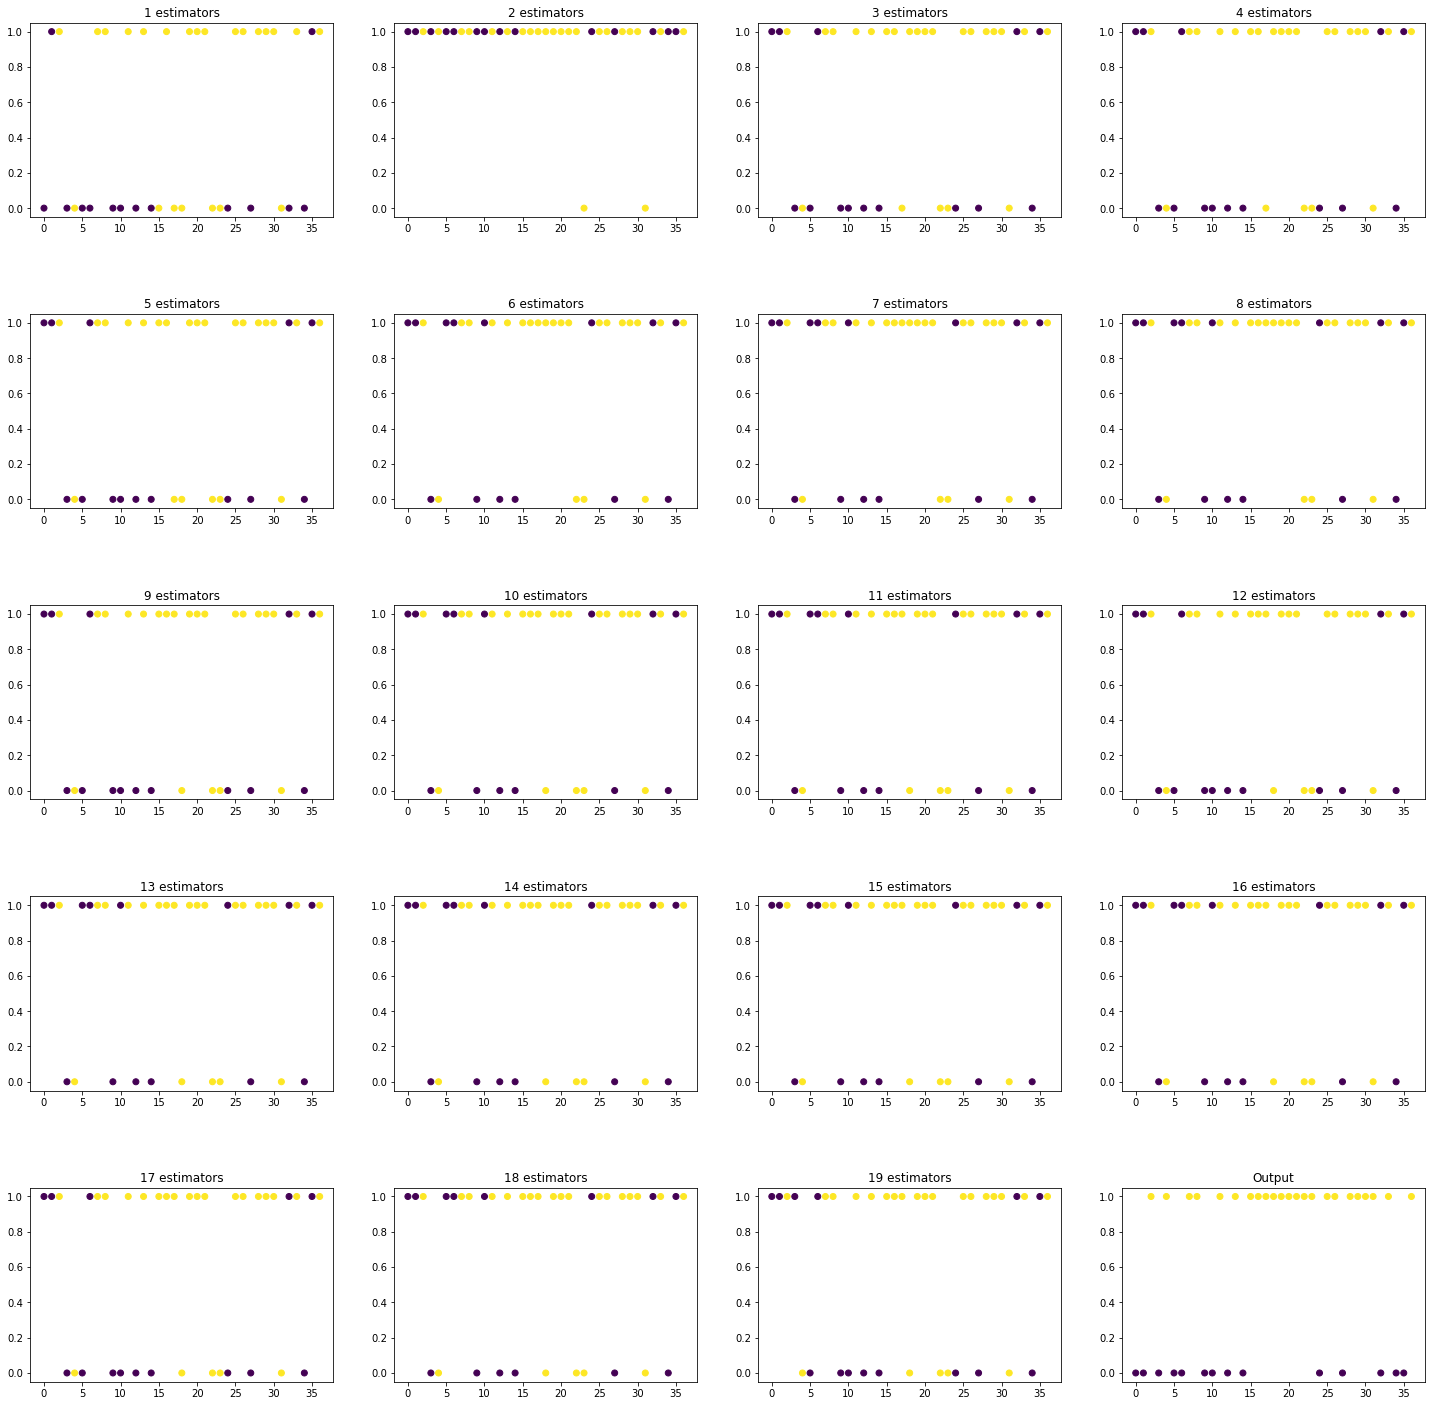

In [425]:
colors = ['red','green']
labels=[0,1]
plt.figure(figsize=(25,25))
for num in range(1,20):
    plt.subplot(5,4,num)
    plt.scatter(np.arange(len(stg_pred[num-1])), stg_pred[num-1], c=y_test)
    plt.title("%d estimators"%(num))
    
plt.subplot(5,4,20)           
plt.scatter(np.arange(len(stg_pred[0])), y_test, c=y_test)
plt.title("Output")

plt.subplots_adjust(hspace=0.5)


In [351]:

ada_clf.score(X_test, y_test)

C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.7297297297297297

The above plot is predcition for X_test for each estimator iteration.
You can see the correspondence between accuracy score and scatter plot.

The first iteration has highest accuracy hence the first plot is very similar to output plot.
The second iteration has lower accuracy and its plot shows poor classification.

Conclusions:

I have learnt that ensemble algorithms are widely used in industry. They are most preferred in DataScience hackathons.
without the thorough understanding of algorithm, it is difficult to improve the performance over real time datasets.

I have demonstrated the adaboost algorithm with practical implementation.
Next I move on to Gradient Boost, and the XG boost with the same dataset.



Please share, comment your views on this notebook
